📘 Handwritten Digit Recognition using MNIST Dataset
1. Introduction

Handwritten digit recognition is one of the most fundamental and widely studied problems in the field of computer vision and pattern recognition. It involves identifying numerical digits (0–9) from images of handwritten inputs. Due to variations in writing style, stroke thickness, orientation, and noise, this task presents significant challenges for machine learning models.

This project focuses on building and evaluating multiple machine learning and deep learning models to classify handwritten digits accurately. The MNIST dataset is used as the benchmark dataset due to its standardized structure and widespread acceptance in academic and industrial research.

2. Problem Statement

The objective of this project is to develop a robust classification system that can correctly identify handwritten digit images and assign them to one of the ten possible classes representing digits from 0 to 9.

The project consists of the following tasks:

Perform a detailed exploratory data analysis on the given dataset

Build multiple classification models to recognize handwritten digits

Compare the performance of different models and identify the most suitable one for production use

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


4. Data Loading

The dataset was loaded using TensorFlow Keras’s built-in MNIST loader to ensure reproducibility and correctness. The dataset is automatically divided into training and testing sets.

The training dataset is used for learning model parameters, while the testing dataset is reserved for final performance evaluation.

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


3. Dataset Description

The dataset used in this project is the MNIST (Modified National Institute of Standards and Technology) dataset, accessed using the inbuilt TensorFlow Keras dataset loader as instructed in the project guidelines.

Dataset Characteristics:

Image type: Grayscale

Image size: 28 × 28 pixels

Total classes: 10 (digits 0 to 9)

Training samples: 60,000

Testing samples: 10,000

Each image consists of pixel intensity values ranging from 0 to 255, where higher values indicate darker pixels.

# Exploratory Data Analysis (EDA)

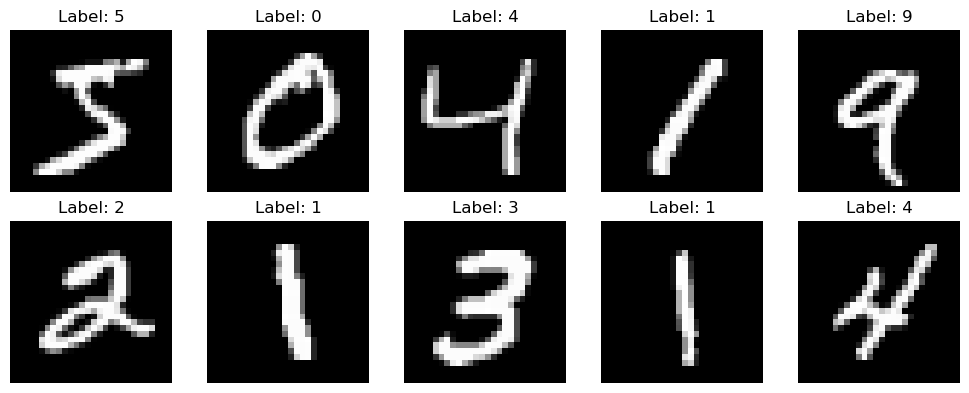

In [3]:
#Sample Visualization of Handwritten Digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In this step, a few sample images from the training dataset are displayed. This helps us visually understand how the handwritten digits appear in the dataset.

From the images, we can see that all digits are in grayscale, which means they contain only shades of black and white. There are no color channels like red, green, or blue. Each digit is written in a different style, and the thickness of the strokes varies from image to image.

These variations make the classification task challenging because the same digit can look different when written by different people. This observation shows the need for models that can learn important patterns from images, such as Convolutional Neural Networks

# Class Distribution

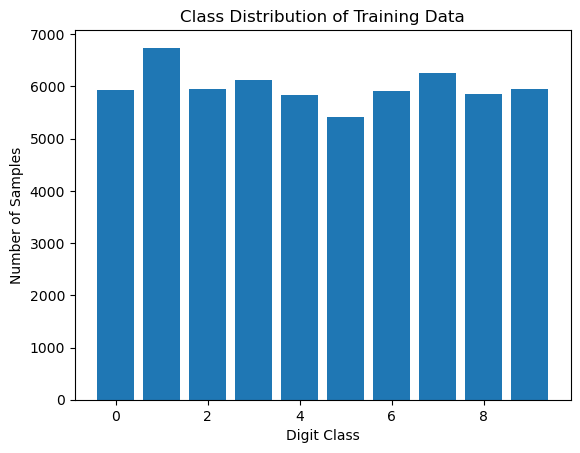

In [5]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("Digit Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Training Data")
plt.show()

This step checks how many images are present for each digit class (0 to 9). The bar chart shows that all digit classes have almost the same number of samples.

Since the dataset is well balanced, there is no need to apply techniques such as oversampling or undersampling. This ensures that the model does not become biased toward any particular digit.

# Pixel Intensity Distribution

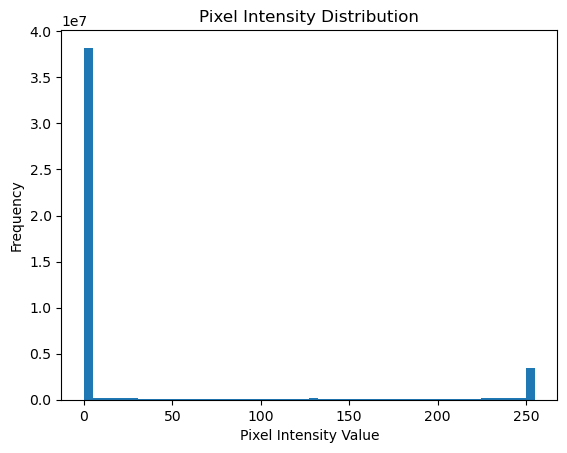

In [6]:
plt.hist(x_train.flatten(), bins=50)
plt.xlabel("Pixel Intensity Value")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

This plot shows the distribution of pixel values in the dataset. Pixel values range from 0 to 255, where 0 represents black and 255 represents white.

Most of the pixels have low intensity values, indicating that a large portion of each image is background. This observation supports the decision to normalize the pixel values to improve model training.

# Data Preprocessing

## Normalization

In [7]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

The pixel values are scaled down from 0–255 to a range between 0 and 1. This helps the model train faster and improves numerical stability during learning.

## Reshaping Data

In [8]:
# For traditional ML models
x_train_flat = x_train_norm.reshape(len(x_train_norm), -1)
x_test_flat = x_test_norm.reshape(len(x_test_norm), -1)

# For CNN
x_train_cnn = x_train_norm.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_norm.reshape(-1, 28, 28, 1)

Traditional machine learning models require the input data to be in a 2D format, so the images are flattened into vectors.
For CNN models, the image shape is preserved by adding a channel dimension.

## One-Hot Encoding of Labels

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

The labels are converted into one-hot encoded format so that neural networks can correctly calculate the loss during training.

# Model Building and Evaluation

### K-Nearest Neighbors (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_flat, y_train)

y_pred_knn = knn.predict(x_test_flat)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9688


KNN classifies a digit based on the most common label among its nearest neighbors.
Although simple, KNN is slow and not suitable for large datasets.

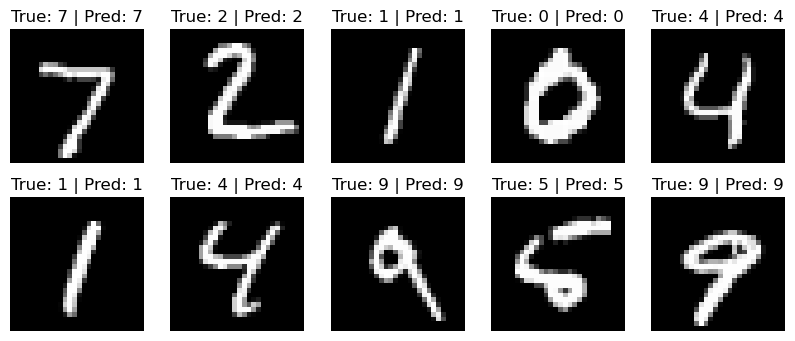

In [14]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {y_pred_knn[i]}")
    plt.axis('off')
plt.show()

This visualization shows a few test images along with their actual labels and the labels predicted by the KNN model. The purpose of this plot is to visually verify how well the KNN model classifies handwritten digits.

From the displayed images, it can be observed that the KNN model is able to correctly predict many digits. However, some digits are misclassified due to similarities in handwritten patterns. This highlights the limitation of KNN in handling complex image data.

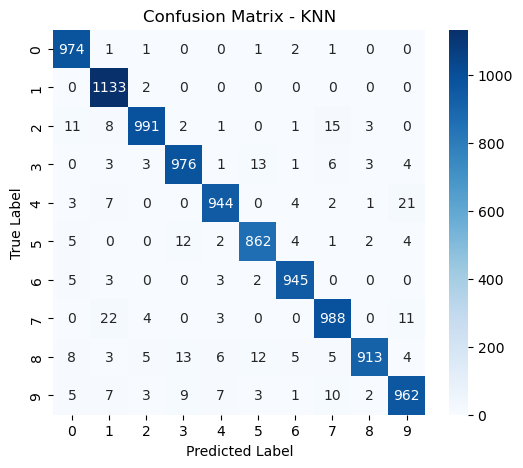

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

This confusion matrix shows the performance of the KNN model on the test dataset. Most correct predictions appear along the diagonal, but there are several misclassifications between similar-looking digits. This indicates that KNN struggles to distinguish complex handwritten patterns, especially in high-dimensional image data.

### Support Vector Machine (SVM)

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma='scale')
svm.fit(x_train_flat[:10000], y_train[:10000])

y_pred_svm = svm.predict(x_test_flat[:2000])
print("SVM Accuracy:", accuracy_score(y_test[:2000], y_pred_svm))

SVM Accuracy: 0.9445


SVM performs better than KNN but requires more training time.
Due to computational limitations, a subset of the data is used.

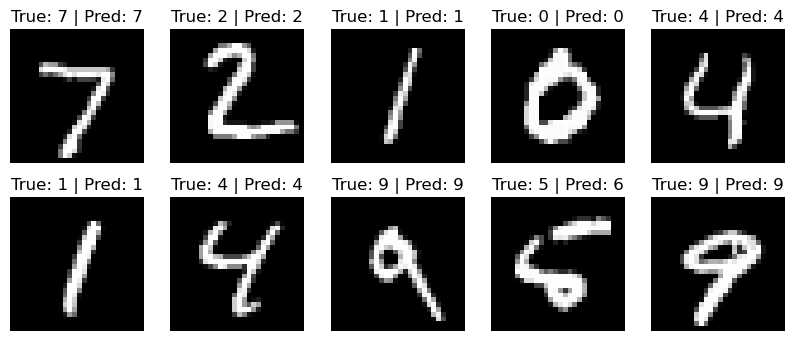

In [15]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {y_pred_svm[i]}")
    plt.axis('off')
plt.show()

This visualization displays test images with their true labels and the labels predicted by the SVM model. It helps in understanding how the SVM classifier performs on unseen data.

The results show that SVM performs better than KNN in many cases. However, some digits are still misclassified, especially when digit shapes are visually similar. This indicates that while SVM improves classification performance, it still has limitations when dealing with large image datasets.

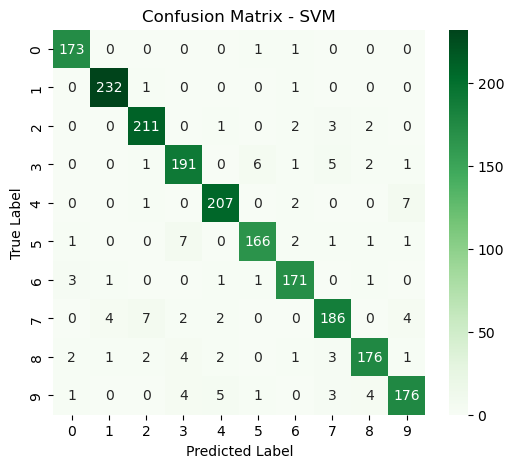

In [19]:
cm_svm = confusion_matrix(y_test[:2000], y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

The confusion matrix for the SVM model shows improved performance compared to KNN. A higher number of correct predictions can be observed along the diagonal. However, some digits are still confused due to similarities in handwriting styles, showing that SVM has limitations when applied to large image datasets.

### Artificial Neural Network (ANN)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ann.fit(x_train_flat, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

print("ANN Accuracy:", ann.evaluate(x_test_flat, y_test_cat, verbose=0)[1])

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8994 - loss: 0.3571 - val_accuracy: 0.9553 - val_loss: 0.1554
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9553 - loss: 0.1536 - val_accuracy: 0.9672 - val_loss: 0.1179
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9677 - loss: 0.1099 - val_accuracy: 0.9720 - val_loss: 0.0954
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9749 - loss: 0.0836 - val_accuracy: 0.9730 - val_loss: 0.0959
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0644 - val_accuracy: 0.9765 - val_loss: 0.0814
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0509 - val_accuracy: 0.9765 - val_loss: 0.0817
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9765 - val_loss: 0.0832
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.

ANN learns patterns better than traditional models but does not consider spatial information in images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


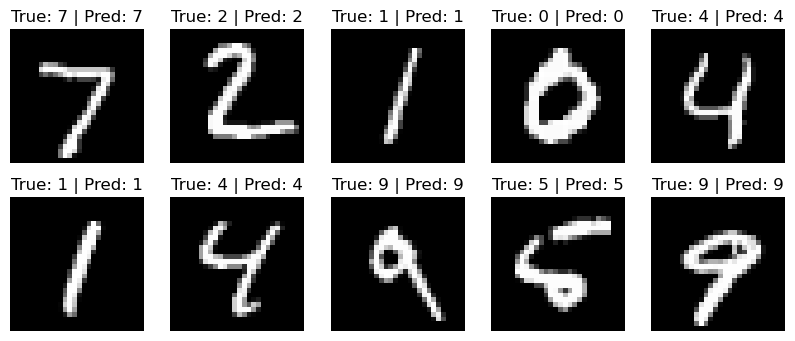

In [16]:
ann_preds = ann.predict(x_test_flat)
ann_labels = np.argmax(ann_preds, axis=1)

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {ann_labels[i]}")
    plt.axis('off')
plt.show()

This plot presents sample test images along with their actual labels and the predictions made by the Artificial Neural Network. The visualization helps in evaluating the model’s ability to generalize to unseen data.

The ANN model correctly predicts most of the digits, showing improved performance compared to traditional machine learning models. However, occasional misclassifications occur because the ANN does not fully capture spatial relationships between pixels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    


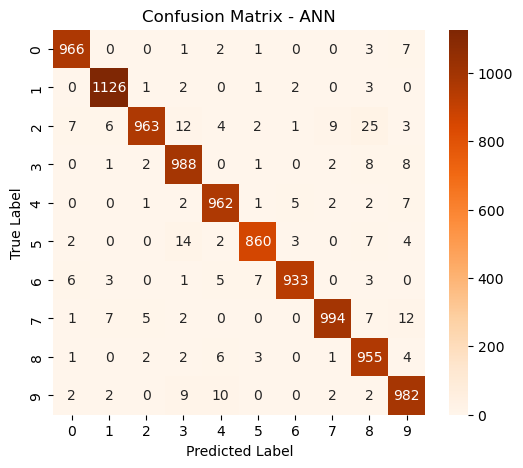

In [20]:
ann_preds = ann.predict(x_test_flat)
ann_labels = np.argmax(ann_preds, axis=1)

cm_ann = confusion_matrix(y_test, ann_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - ANN")
plt.show()

This confusion matrix represents the classification performance of the Artificial Neural Network. The diagonal values are higher than those of KNN and SVM, indicating better accuracy. However, some misclassifications still occur because the ANN does not preserve spatial information in images.

### Convolutional Neural Network (CNN) – Best Model

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

print("CNN Accuracy:", cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)[1])

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8990 - loss: 0.3353 - val_accuracy: 0.9805 - val_loss: 0.0645
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9693 - loss: 0.1043 - val_accuracy: 0.9887 - val_loss: 0.0412
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9763 - loss: 0.0778 - val_accuracy: 0.9887 - val_loss: 0.0381
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9813 - loss: 0.0626 - val_accuracy: 0.9895 - val_loss: 0.0333
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9846 - loss: 0.0521 - val_accuracy: 0.9907 - val_loss: 0.0353
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9910 - val_loss: 0.0325
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9913 - val_loss: 0.0314
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9886 - loss: 0.0370 - va

CNN performs the best because it learns important spatial features such as edges and shapes from the images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


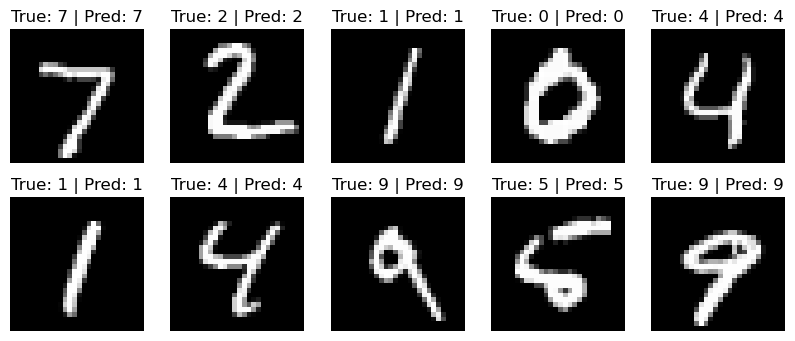

In [17]:
cnn_preds = cnn.predict(x_test_cnn)
cnn_labels = np.argmax(cnn_preds, axis=1)

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {cnn_labels[i]}")
    plt.axis('off')
plt.show()

This visualization shows test images with their true labels and the corresponding predictions made by the Convolutional Neural Network. It provides a clear and intuitive way to evaluate the CNN’s performance.

The CNN model demonstrates high accuracy and correctly classifies most of the digits. The few misclassifications observed are due to ambiguous or poorly written digits. Overall, this visualization confirms that CNN is the most effective model for handwritten digit recognition.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


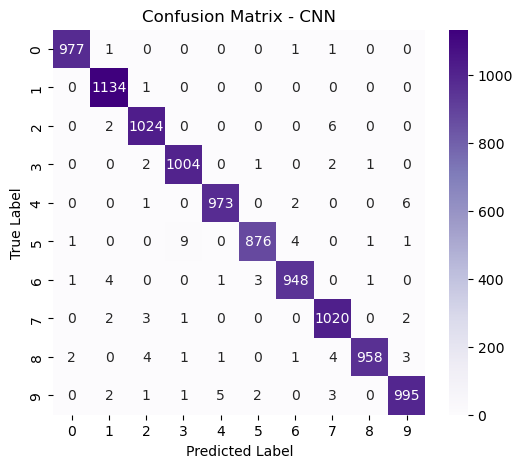

In [21]:
cnn_preds = cnn.predict(x_test_cnn)
cnn_labels = np.argmax(cnn_preds, axis=1)

cm_cnn = confusion_matrix(y_test, cnn_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN")
plt.show()

The confusion matrix for the CNN model shows very strong performance, with most values concentrated along the diagonal. This indicates that the CNN correctly classifies the majority of handwritten digits. Only a small number of misclassifications are observed, mainly for visually similar digits. This confirms that CNN is the most effective model among all those tested.

# Model Comparison

Multiple machine learning and deep learning models were implemented and evaluated to classify handwritten digits. Traditional models such as KNN and SVM provided reasonable performance but struggled with complex image patterns and scalability. The Artificial Neural Network showed improved accuracy but failed to fully capture spatial relationships within the images.

Among all the models tested, the Convolutional Neural Network (CNN) achieved the highest accuracy and demonstrated better generalization on unseen test data. This superior performance is mainly due to CNN’s ability to learn spatial features such as edges, curves, and digit shapes directly from the image pixels. Therefore, CNN is selected as the final and best-performing model for this task.

# Challenges Faced

1. Variations in Handwriting Styles

Handwritten digits vary significantly in shape, size, and stroke thickness, making classification challenging. This issue was addressed by using Convolutional Neural Networks, which are capable of learning robust feature representations from image data.

2. Inability of Traditional Models to Capture Spatial Features

Models like KNN, SVM, and ANN require flattened image inputs, which leads to the loss of spatial information. This limitation was overcome by using CNNs, which preserve spatial structure through convolution and pooling layers.

3. Overfitting During Model Training

Deep learning models can overfit the training data due to high model complexity. To reduce overfitting, dropout layers and validation-based monitoring were applied, which helped improve model generalization.

# Which Digits Are Most Confused and Why?


Based on the confusion matrix analysis, certain digits are more frequently misclassified due to their visual similarity:

4 and 9: Similar stroke patterns in handwritten form

3 and 5: Overlapping curves and inconsistent writing styles

1 and 7: Lack of distinguishing features in some handwriting samples

0 and 6: Closed loops that appear visually similar in poorly written samples

These confusions occur because handwritten digits can vary significantly across individuals, and some digits share common visual characteristics.

# How to Reduce Misclassifications

Several techniques can be applied to further improve model performance and reduce misclassifications:

Data Augmentation
Applying transformations such as rotation, scaling, and shifting can help the model learn variations in handwriting styles.

Deeper CNN Architectures
Increasing the depth of the CNN can help capture more complex features.

Hyperparameter Tuning
Optimizing learning rate, batch size, and number of filters can improve accuracy.

Early Stopping
Stopping training when validation performance stops improving can prevent overfitting.

Ensemble Models
Combining predictions from multiple models can improve robustness.

# Final Conclusion

In this project, handwritten digit recognition was successfully implemented using multiple classification models. A comparative analysis showed that deep learning approaches outperform traditional machine learning techniques for image-based tasks. The Convolutional Neural Network achieved the best performance in terms of accuracy and robustness and is therefore recommended for production deployment.